## Context:
Company X manages the men's top professional basketball division of the American league system. 
The dataset contains information on all the teams that have participated in all the past tournaments. It has data 
about how many baskets each team scored, conceded, how many times they came within the first 2 positions, 
how many tournaments they have qualified, their best position in the past, etc.



In [11]:
# AS-Project

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# read data from csv file.

dataset = pd.read_csv("Basketball.csv")

### Step1: Read the data set, clean the data and prepare a final dataset to be used for analysis

In [12]:
# ==>issue1: Dates present in Team Launch date is in different formats as shown in below. 
# date formats : 1931to32,1941-42,1951_52

#Solution : wen we are having date reange as mentioned in above formats in any row we will make start date as launch date to make data as uniform across for all the teams
#using regex pattern: r'^(\d{4})' to make starting date as launch date.

dataset['TeamLaunch'] = dataset['TeamLaunch'].str.extract(r'^(\d{4})', expand=False)

# ==>issue2: lots of the data across the different rows has been filled with '-' as value to represent no value. which will be tough wen it will be used for plotting
#Solution: we will be replacing '-' value with 0 across all the rows and columns
# ==> Replacing value '-' present in dataset with 0 across the dataset
dataset = dataset.replace('-',0)

dataset.head(10)


,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1
5,Team 6,73,2819,2408,990,531,887,3680,3373,1,4,1934,1
6,Team 7,82,2792,2626,948,608,1070,3609,3889,0,0,1929,3
7,Team 8,70,2573,2302,864,577,861,3228,3230,2,3,1929,1
8,Team 9,58,2109,1986,698,522,766,2683,2847,0,1,1939,2
9,Team 10,51,1884,1728,606,440,682,2159,2492,1,0,1932,1


### Step2:Perform detailed statistical analysis and EDA using univariate, bi-variate and multivariate EDA techniques to get a data driven insights on recommending which teams they can approach which will be a deal win for them.. Also as a data and statistics expert you have to develop a detailed performance report using this data


### Plot1: plotting for No.of championships won per each Team(will be including only teams that won the tournament atleast once)

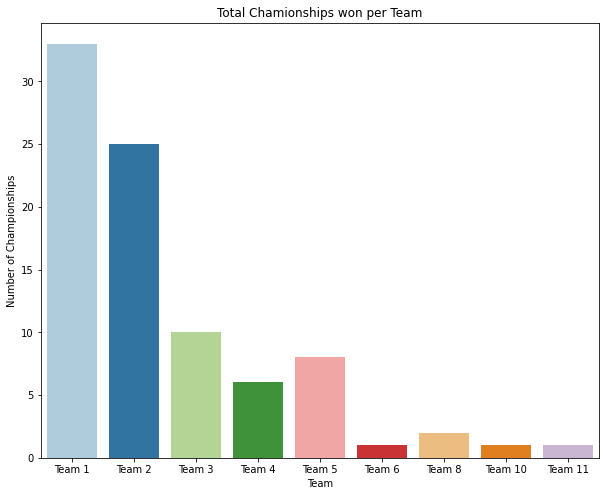

In [14]:

#Converting TournamentChampion column to numeric which will be used for plotting the graph
dataset['TournamentChampion'] = pd.to_numeric(dataset['TournamentChampion'])
dt = dataset[dataset['TournamentChampion'] > 0] # filtering above dataset for the teams which have won atleast one championship
sns.barplot('Team','TournamentChampion', orient="v",  data=dt, palette='Paired');
plt.title('Total Chamionships won per Team')
plt.ylabel('Number of Championships')
plt.xlabel('Team')
#plt.xticks(rotation = 90)
plt.rcParams["figure.figsize"] = (10, 8)
plt.show();


#### Plot1 - Observations:
As seen in the above plot Team1 has won most championships in the tournament followed by Team2

### Plot2: plotting No. of times a team reached finals(will be including teams reaching final atleast once)

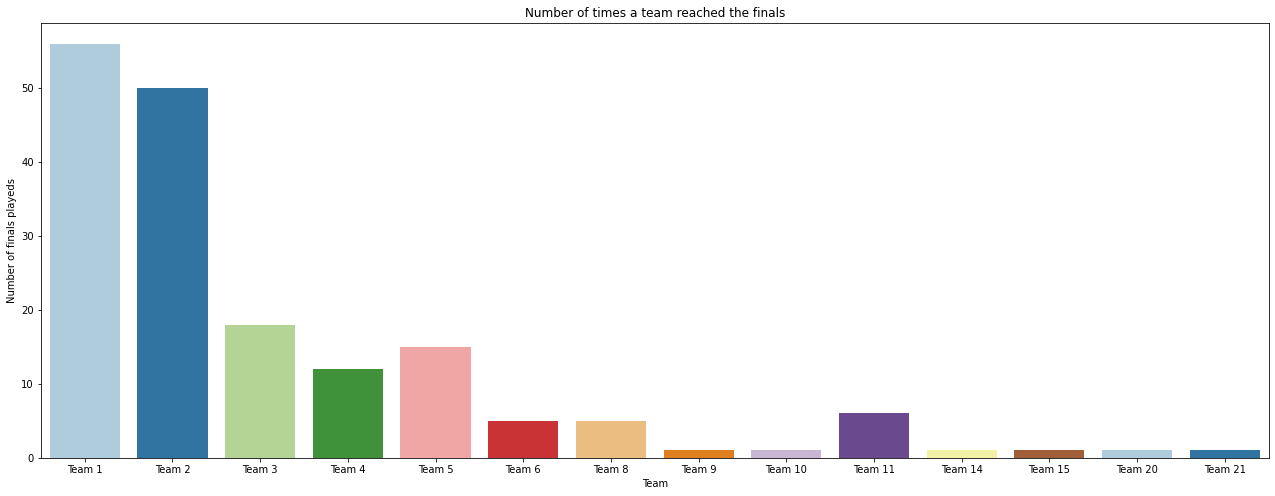

In [17]:

# No. of times a team reached finals ==> [No.of Champiionships + No. of RunnerUps]

dataset['Runner-up'] = pd.to_numeric(dataset['Runner-up'])
dt = dataset[(dataset['TournamentChampion'] > 0) | (dataset['Runner-up'] > 0)] # filtering above dataset for the teams which have won atleast one championship
dt['reached-finals'] = dt['TournamentChampion'] + dt ['Runner-up']
sns.barplot('Team','reached-finals', orient="v",  data=dt, palette='Paired');
plt.title('Number of times a team reached the finals')
plt.ylabel('Number of finals playeds')
plt.xlabel('Team')
plt.rcParams["figure.figsize"] = (22, 8)
plt.show();


#### Plot2 - Observations:
As seen in the below plot Team1 has reached more finals in the toutnament history followed by Team2

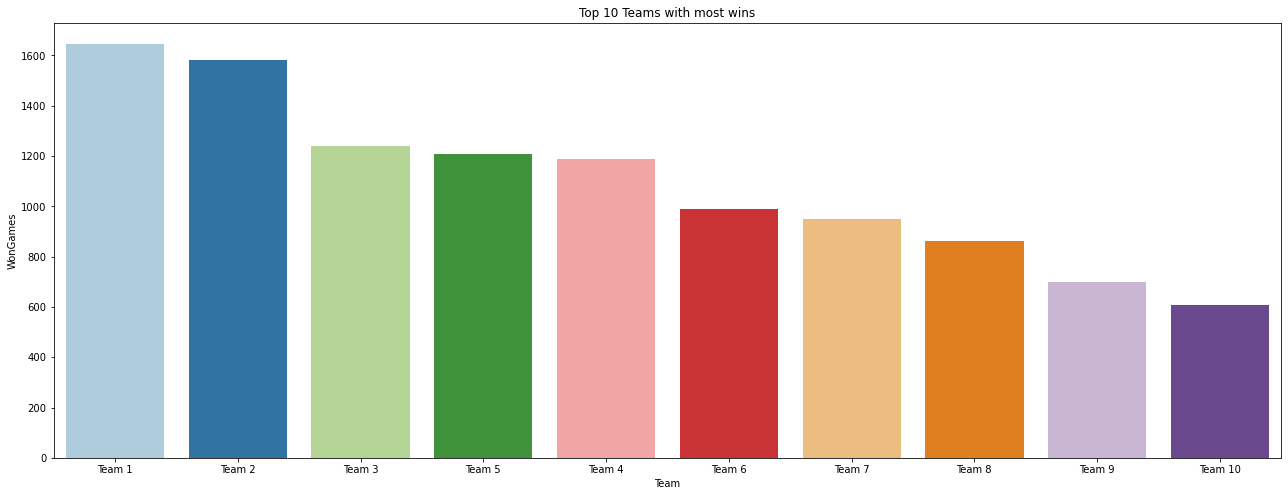

In [6]:
# will plot Top 10 Teams with most wins 

dataset['WonGames'] = pd.to_numeric(dataset['WonGames'])
dataset.sort_values(by=['WonGames'], inplace=True, ascending=False)
dt = dataset[(dataset['WonGames'] > 0)].head(10) # filtering above dataset for the teams which have won atleast one championship
dt['WonGames'] =  dt ['WonGames']
plt.title('Top 10 Teams with most wins')
plt.ylabel('Team')
plt.xlabel('No. of Wins')
plt.rcParams["figure.figsize"] = (10, 8)
#plt.show();
sns.barplot('Team','WonGames', orient="v",  data=dt, palette='Paired');

#Observations:
#Team1 has most wins followed by Team2 

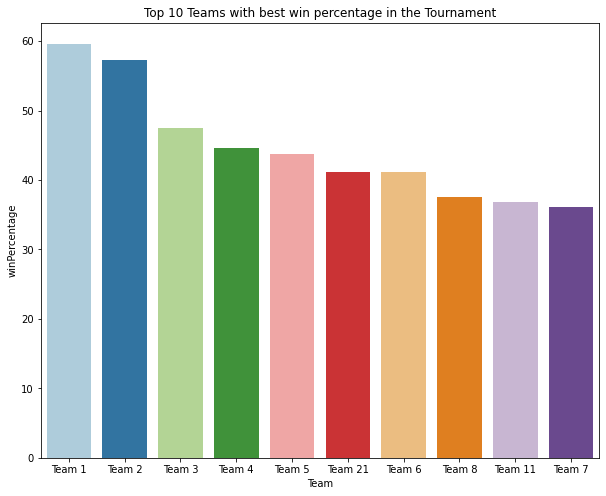

In [7]:
# As new teams are being included through the history of tournament will be Plotting win% for each team.

#Calculating win% = wonGames/totalGamesPlayed

dataset['WonGames'] = pd.to_numeric(dataset['WonGames'])
dataset['PlayedGames'] = pd.to_numeric(dataset['PlayedGames'])
dt = dataset[(dataset['WonGames'] > 0)] # filtering above dataset for the teams which have won atleast one game
dt['winPercentage'] = (dt['WonGames']/dt['PlayedGames'])*100
dt.sort_values(by=['winPercentage'], inplace=True, ascending=False)
dt = dt.head(10)
plt.title('Top 10 Teams with best win percentage in the Tournament')
plt.ylabel('Team')
plt.xlabel('No. of Wins')
plt.rcParams["figure.figsize"] = (10, 8)
#plt.show();
sns.barplot('Team','winPercentage', orient="v",  data=dt, palette='Paired');



#Observation:
#Team1 has most win percentage in history of the tournament followed by Team2
#Team60 has worst win percentage in history of the tournament followed by Team55

1929


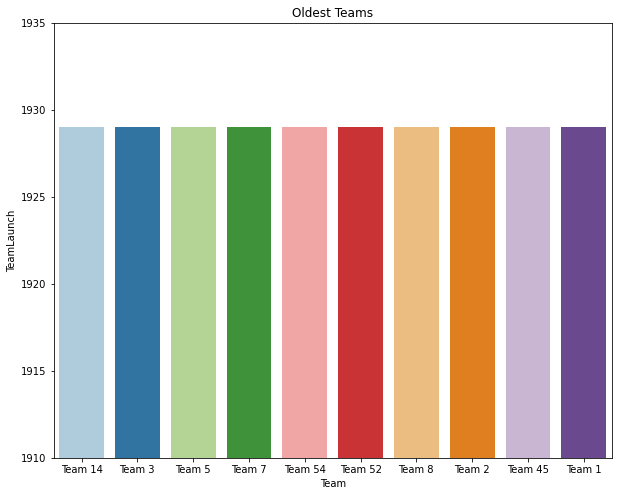

In [8]:
# will be plotting Launch Date for oldest team.

dataset['TeamLaunch'] = pd.to_numeric(dataset['TeamLaunch'])
dataset.sort_values(by=['TeamLaunch'], inplace=True, ascending=False)
min_Val = dataset['TeamLaunch'].min()
dt =dataset[dataset['TeamLaunch'] == min_Val]
plt.title('Oldest Teams')
plt.ylabel('Team')
plt.xlabel('Launch Date')
plt.rcParams["figure.figsize"] = (10, 8)
plt.ylim(1910, 1935)
#plt.show();
sns.barplot('Team','TeamLaunch', orient="v",  data=dt, palette='Paired');
print(dataset['TeamLaunch'].min())

#Observations
# below Teams are the oldest teams

### Observations:
AS per above plotted graphs Team1 is the most suuccessfull Team in the tournament.P lease find the below details:
Team1(Successfull Team):
1.highest no of championships, 
2.More times reached finals
3.More wins and also has most win%(relative to games played).
4.One of oldest teams in the tournament.

As per above analysis below teams are followed by team1:

Team2: Team2 is second most successfull team with coming second on all criteria plotted in the above graph

Team3,Team4 closely follows the above team as successfull teams.


### Please include any improvements or suggestions to the association management on quality, quantity, variety, velocity, veracity etc. on the data points collected by the association to perform a better data analysis in future

***Suggestions***: 
1.It it would be better if datapoints includes something like won/loss record of home and away games to measure performance
2.
